## Importando módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from logistic_regression import *
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

## Pré-processamento dos dados

In [2]:
data = pd.read_csv('../breastcancer.csv', header=None)

X = data.iloc[:, :-1].values
y = (data.iloc[:, -1].values).reshape(-1, 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
normalizer = StandardScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = np.hstack((np.ones((X_train_norm.shape[0], 1)), X_train_norm))
X_test_norm = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))

## Regressão Logística

### Treinando o modelo

In [29]:
kf = KFold(n_splits=10, shuffle=True)
accuracies = list()
logs = list()

model = LogisticRegression()

for train_index, test_index in kf.split(X_train_norm):
     X_train_norm_train, X_train_norm_val, y_train_train, y_train_val = (X_train_norm[train_index], 
                                                                         X_train_norm[test_index],
                                                                         y_train[train_index],
                                                                         y_train[test_index])
     
     model.fit(X_train_norm_train, y_train_train, num_epochs=50)
     y_pred = model.pred(X_train_norm_val)
     y_pred_where = np.where(y_pred < 0.5, 0, 1)
     acc = accuracy_score(y_train_val, y_pred_where)
     cm = confusion_matrix(y_train_val, y_pred_where, normalize='true')
     accuracies.append([acc, cm[0][0], cm[1][1]])
     logs.append(model.get_log())
     

### Plotando as curvas de loss

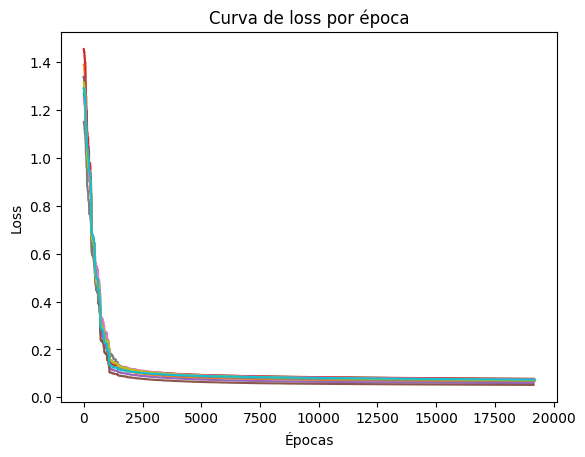

In [32]:
plt.title('Curva de loss por época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
for i in range(10):
    rng = range(len(logs[i]))
    plt.plot(rng, logs[i])
plt.show()

### Plotando as medidas descritivas

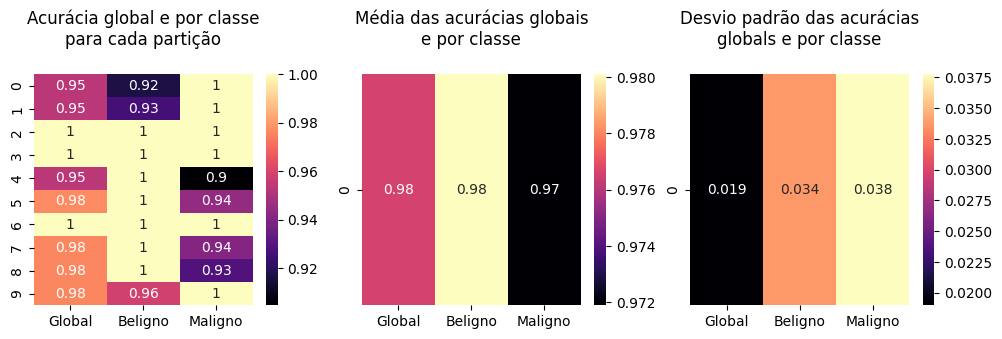

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

xlabels = ['Global', 'Beligno', 'Maligno']
ylabels = range(len(accuracies))
per_fold = sns.heatmap(accuracies, annot=True, xticklabels=xlabels, yticklabels=ylabels, cmap='magma', ax=ax1)
means = sns.heatmap([np.mean(accuracies, axis=0)], xticklabels=xlabels, annot=True, cmap='magma', ax=ax2)
stds = sns.heatmap([np.std(accuracies, axis=0, ddof=1)], xticklabels=xlabels, annot=True, cmap='magma', ax=ax3)

ax1.set_title('Acurácia global e por classe\npara cada partição\n')
ax2.set_title('Média das acurácias globais\ne por classe\n')
ax3.set_title('Desvio padrão das acurácias\nglobals e por classe\n')
plt.show()